<a href="https://colab.research.google.com/github/QuocHuy-1602/SelfDriving/blob/main/self_driving_cars.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  Download Dataset and Module

In [ ]:
import numpy as np
import PIL
from PIL import Image
from IPython.display import display
import matplotlib.pyplot as plt
from glob import glob
import random
import cv2
import warnings
warnings.simplefilter('ignore')
import pandas as pd

In [ ]:
df.iloc[0:10,:]

frame  xmin  xmax  ymin  ymax  class_id
0  1478019952686311006.jpg   237   251   143   155         1
1  1478019952686311006.jpg   437   454   120   186         3
2  1478019953180167674.jpg   218   231   146   158         1
3  1478019953689774621.jpg   171   182   141   154         2
4  1478019953689774621.jpg   179   191   144   155         1
5  1478019953689774621.jpg   206   220   145   156         1
6  1478019953689774621.jpg   385   420   122   152         1
7  1478019953689774621.jpg   411   462   124   148         1
8  1478019954186238236.jpg   165   177   140   154         2
9  1478019954186238236.jpg   171   182   144   157         1

## Installing supervision and ultralytics for yolo

In [ ]:
!pip install ultralytics supervision

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 609.4/609.4 kB 9.8 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.3/59.3 kB 4.8 MB/s eta 0:00:00


In [ ]:
import ultralytics
from ultralytics import YOLO
yolo_model = YOLO('yolov8m.pt')

100%|██████████| 49.7M/49.7M [00:00<00:00, 194MB/s]


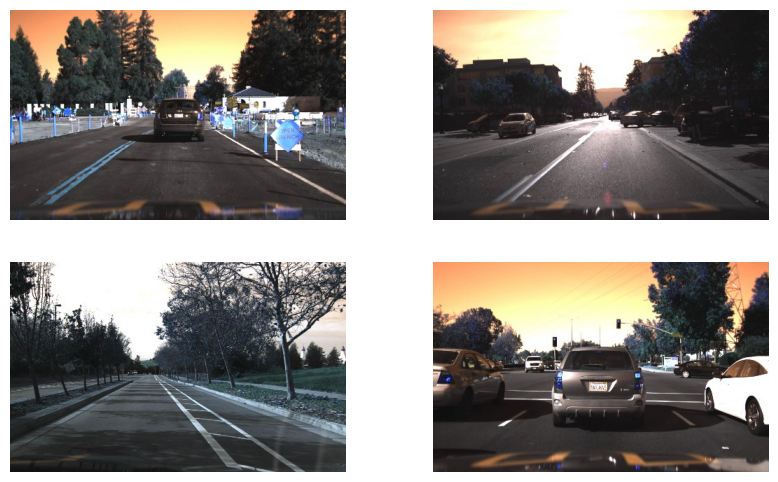

In [ ]:
root_path = '/kaggle/input/self-driving-cars/images/*'
num_samples = 4
images_data = glob(root_path)
random_image = random.sample(images_data, num_samples)

plt.figure(figsize=(10,6))
for i in range(num_samples):
    plt.subplot(2,2,i+1)
    plt.imshow(cv2.imread(random_image[i]))
    plt.axis('off')

In [ ]:
# Create a list to store the images
images = []
for i in range(num_samples):
    yolo_outputs = yolo_model.predict(random_image[i])
    output = yolo_outputs[0]
    box = output.boxes
    names = output.names

    for j in range(len(box)):
        labels = names[box.cls[j].item()]
        coordinates = box.xyxy[j].tolist()
        confidence = np.round(box.conf[j].item(), 2)
        #print(f'In this image {len(box)} objects has been detected.')
        print(f'Object {j + 1} is: {labels}')
        print(f'Coordinates are: {coordinates}')
        print(f'Confidence is: {confidence}')
        print('-------')

    # Store the image in the 'images' list
    images.append(output.plot()[:, :, ::-1])


image 1/1 /kaggle/input/self-driving-cars/images/1479503485311107105.jpg: 416x640 1 car, 559.3ms
Speed: 2.5ms preprocess, 559.3ms inference, 1.1ms postprocess per image at shape (1, 3, 416, 640)



Object 1 is: car
Coordinates are: [204.42958068847656, 125.99919891357422, 278.75543212890625, 188.3494873046875]
Confidence is: 0.91
-------


image 1/1 /kaggle/input/self-driving-cars/images/1479504213362469574.jpg: 416x640 11 cars, 540.7ms
Speed: 2.0ms preprocess, 540.7ms inference, 1.2ms postprocess per image at shape (1, 3, 416, 640)



Object 1 is: car
Coordinates are: [92.23566436767578, 146.4415283203125, 147.4541015625, 183.63441467285156]
Confidence is: 0.91
-------
Object 2 is: car
Coordinates are: [267.0376281738281, 143.3963623046875, 321.09814453125, 168.4685821533203]
Confidence is: 0.86
-------
Object 3 is: car
Coordinates are: [48.03818893432617, 146.5868377685547, 108.71640014648438, 175.8800506591797]
Confidence is: 0.79
-------
Object 4 is: car
Coordinates are: [308.217529296875, 143.13304138183594, 344.9202880859375, 165.0026092529297]
Confidence is: 0.7
-------
Object 5 is: car
Coordinates are: [251.06369018554688, 144.21041870117188, 268.9734191894531, 158.68817138671875]
Confidence is: 0.63
-------
Object 6 is: car
Coordinates are: [225.7016143798828, 145.7530517578125, 237.4723663330078, 154.76043701171875]
Confidence is: 0.58
-------
Object 7 is: car
Coordinates are: [342.4320373535156, 131.1868896484375, 400.30108642578125, 174.86669921875]
Confidence is: 0.55
-------
Object 8 is: car
Coordinates

image 1/1 /kaggle/input/self-driving-cars/images/1478898666228903545.jpg: 416x640 (no detections), 542.0ms
Speed: 1.9ms preprocess, 542.0ms inference, 0.7ms postprocess per image at shape (1, 3, 416, 640)

image 1/1 /kaggle/input/self-driving-cars/images/1479502228207342769.jpg: 416x640 7 cars, 1 truck, 2 traffic lights, 530.1ms
Speed: 1.9ms preprocess, 530.1ms inference, 1.1ms postprocess per image at shape (1, 3, 416, 640)


Object 1 is: car
Coordinates are: [387.1187438964844, 133.54559326171875, 479.7446594238281, 247.26287841796875]
Confidence is: 0.94
-------
Object 2 is: car
Coordinates are: [168.68185424804688, 119.29701232910156, 304.794677734375, 236.70794677734375]
Confidence is: 0.94
-------
Object 3 is: car
Coordinates are: [0.21588134765625, 122.98834991455078, 104.10881042480469, 224.77786254882812]
Confidence is: 0.89
-------
Object 4 is: car
Coordinates are: [343.8028564453125, 140.12400817871094, 421.3911437988281, 166.1531524658203]
Confidence is: 0.86
-------
Object 5 is: traffic light
Coordinates are: [262.01324462890625, 81.67955780029297, 268.1997375488281, 95.40489196777344]
Confidence is: 0.76
-------
Object 6 is: car
Coordinates are: [131.4988555908203, 133.7837677001953, 159.06784057617188, 158.4723358154297]
Confidence is: 0.64
-------
Object 7 is: traffic light
Coordinates are: [170.658203125, 106.59819030761719, 177.1798553466797, 120.94164276123047]
Confidence is: 0.59
-------




-------------------------------------- Images after object detection with YOLOV8 --------------------------------


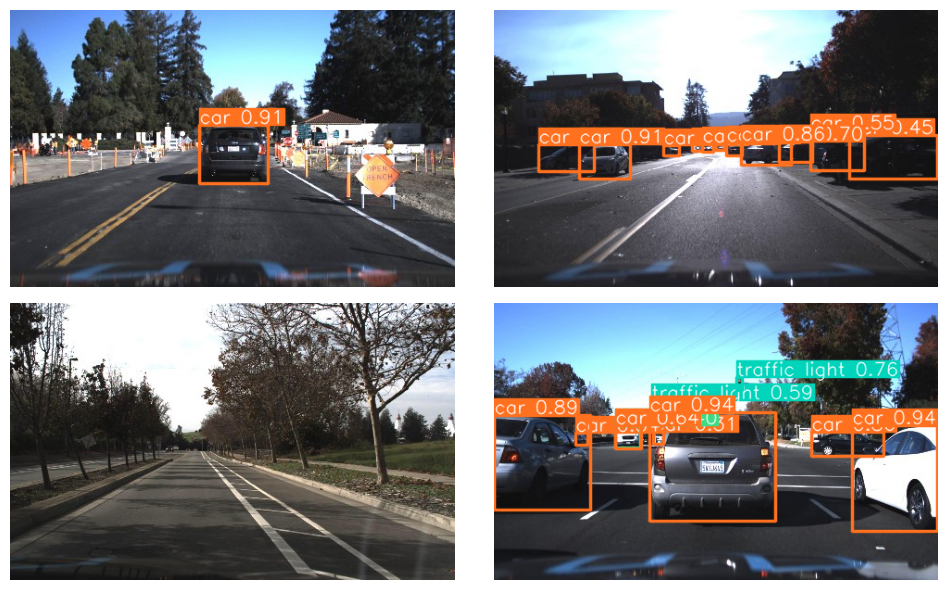

In [ ]:
# plotting the images after object detection
print('\n\n-------------------------------------- Images after object detection with YOLOV8 --------------------------------')

plt.figure(figsize=(10,6))
for i, img in enumerate(images):
    plt.subplot(2, 2, i + 1)
    plt.imshow(img)
    plt.axis('off')
plt.tight_layout()
plt.show()

# Supervision based output filtering

## By specific class

Allows you to select detections that belong only to one selected class.

In [ ]:
img_path = '/kaggle/input/self-driving-cars/images/1479502228207342769.jpg'
image = plt.imread(img_path)
yolo_outputs = yolo_model.predict(img_path)[0]


image 1/1 /kaggle/input/self-driving-cars/images/1479502228207342769.jpg: 416x640 7 cars, 1 truck, 2 traffic lights, 591.3ms
Speed: 3.4ms preprocess, 591.3ms inference, 1.3ms postprocess per image at shape (1, 3, 416, 640)


In [ ]:
import supervision as sv
detections = sv.Detections.from_yolov8(yolo_outputs)
print(detections.class_id)

[2 2 2 2 9 2 9 7 2 2]


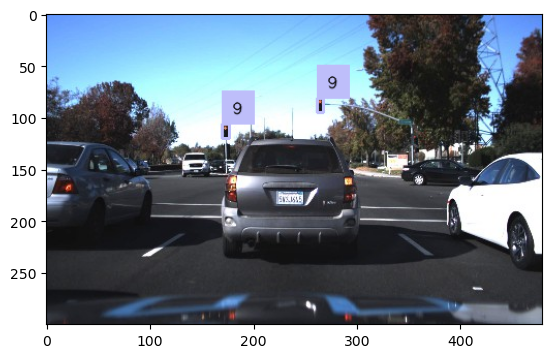

In [ ]:
detections_filter = detections[detections.class_id == 9]

box_annotator = sv.BoxAnnotator()

labels = [f"{class_id} {confidence:0.2f}" for _, _, confidence, class_id, _ in detections]
annotated_frame = box_annotator.annotate(scene=image.copy(),
                                         detections=detections_filter,
                                         labels=labels)

plt.imshow(annotated_frame)

## By set of classes

Allows you to select detections that belong only to selected set of classes.



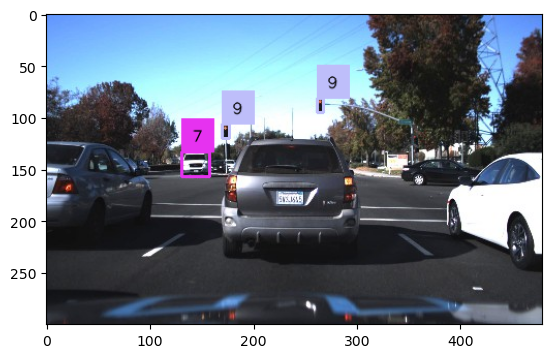

In [ ]:
detections_filter = detections[np.isin(detections.class_id, [7,9])]

box_annotator = sv.BoxAnnotator()

labels = [f"{class_id} {confidence:0.2f}" for _, _, confidence, class_id, _ in detections]
annotated_frame = box_annotator.annotate(scene=image.copy(),
                                         detections=detections_filter,
                                         labels=labels)

plt.imshow(annotated_frame)

## By confidence

Allows you to select detections with specific confidence value, for example higher than selected threshold.



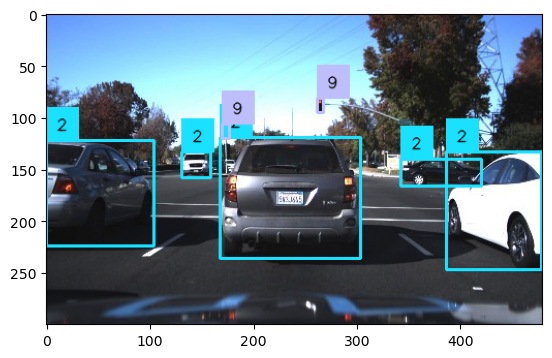

In [ ]:
detections_filter = detections[detections.confidence > 0.5]

box_annotator = sv.BoxAnnotator()

labels = [f"{class_id} {confidence:0.2f}" for _, _, confidence, class_id, _ in detections]
annotated_frame = box_annotator.annotate(scene=image.copy(),
                                         detections=detections_filter,
                                         labels=labels)

plt.imshow(annotated_frame)

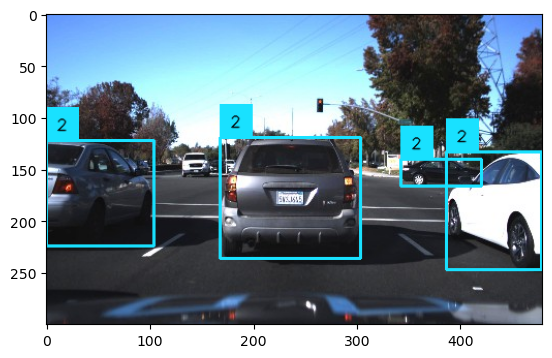

In [ ]:
detections_filter = detections[detections.confidence > 0.8]

box_annotator = sv.BoxAnnotator()

labels = [f"{class_id} {confidence:0.2f}" for _, _, confidence, class_id, _ in detections]
annotated_frame = box_annotator.annotate(scene=image.copy(),
                                         detections=detections_filter,
                                         labels=labels)

plt.imshow(annotated_frame)

## By area

Allows you to select detections based on their size. We define the area as the number of pixels occupied by the detection in the image. In the example below, we have sifted out the detections that are too small.



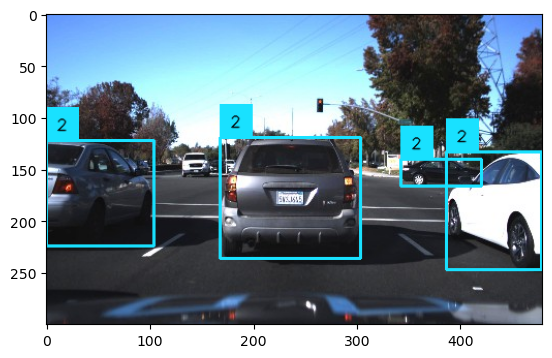

In [ ]:
detections_filter = detections[detections.area > 1000]

box_annotator = sv.BoxAnnotator()

labels = [f"{class_id} {confidence:0.2f}" for _, _, confidence, class_id, _ in detections]
annotated_frame = box_annotator.annotate(scene=image.copy(),
                                         detections=detections_filter,
                                         labels=labels)

plt.imshow(annotated_frame)

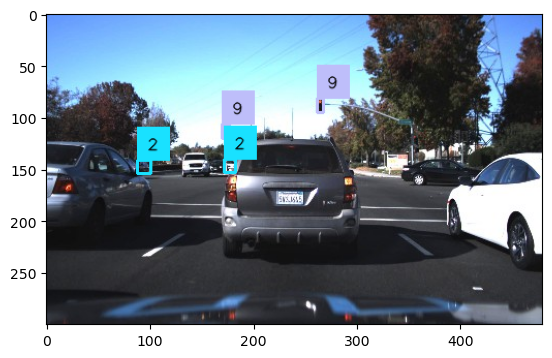

In [ ]:
detections_filter = detections[detections.area < 500]

box_annotator = sv.BoxAnnotator()

labels = [f"{class_id} {confidence:0.2f}" for _, _, confidence, class_id, _ in detections]
annotated_frame = box_annotator.annotate(scene=image.copy(),
                                         detections=detections_filter,
                                         labels=labels)

plt.imshow(annotated_frame)

## By relative area

Allows you to select detections based on their size in relation to the size of whole image. Sometimes the concept of detection size changes depending on the image. Detection occupying 10000 square px can be large on a 1280x720 image but small on a 3840x2160 image. In such cases, we can filter out detections based on the percentage of the image area occupied by them. In the example below, we remove too large detections.



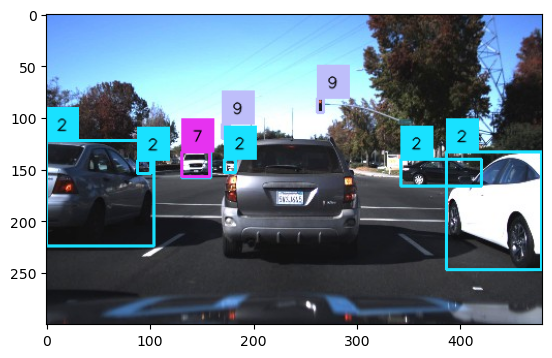

In [ ]:
height, width, channels = image.shape
image_area = height * width

detections_filter = detections[(detections.area / image_area) < 0.1]

box_annotator = sv.BoxAnnotator()

labels = [f"{class_id} {confidence:0.2f}" for _, _, confidence, class_id, _ in detections]
annotated_frame = box_annotator.annotate(scene=image.copy(),
                                         detections=detections_filter,
                                         labels=labels)

plt.imshow(annotated_frame)

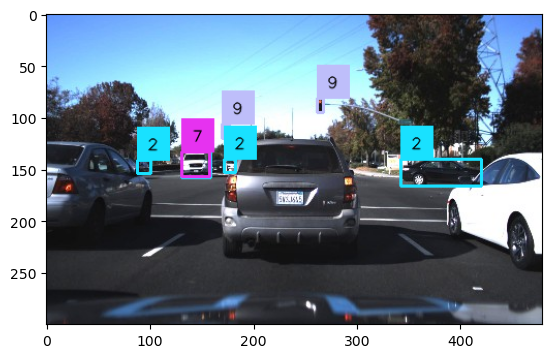

In [ ]:
height, width, channels = image.shape
image_area = height * width

detections_filter = detections[(detections.area / image_area) < 0.02]

box_annotator = sv.BoxAnnotator()

labels = [f"{class_id} {confidence:0.2f}" for _, _, confidence, class_id, _ in detections]
annotated_frame = box_annotator.annotate(scene=image.copy(),
                                         detections=detections_filter,
                                         labels=labels)

plt.imshow(annotated_frame)

## By box dimensions

Allows you to select detections based on their dimensions. The size of the bounding box, as well as its coordinates, can be criteria for rejecting detection. Implementing such filtering requires a bit of custom code but is relatively simple and fast.



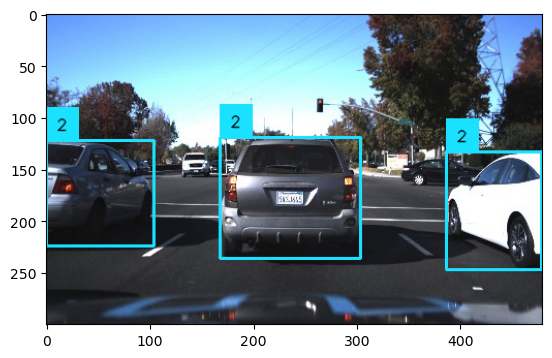

In [ ]:
w = detections.xyxy[:, 2] - detections.xyxy[:, 0]
h = detections.xyxy[:, 3] - detections.xyxy[:, 1]

detections_filter = detections[(w > 20) & (h > 100)]

box_annotator = sv.BoxAnnotator()

labels = [f"{class_id} {confidence:0.2f}" for _, _, confidence, class_id, _ in detections]
annotated_frame = box_annotator.annotate(scene=image.copy(),
                                         detections=detections_filter,
                                         labels=labels)

plt.imshow(annotated_frame)

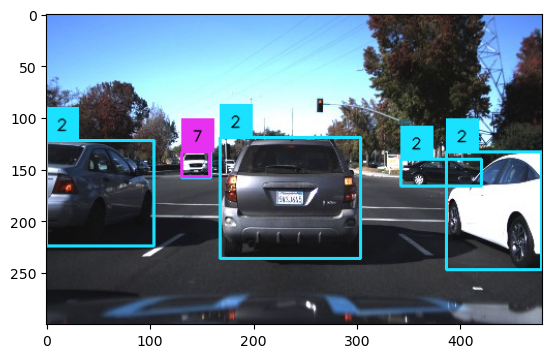

In [ ]:
w = detections.xyxy[:, 2] - detections.xyxy[:, 0]
h = detections.xyxy[:, 3] - detections.xyxy[:, 1]

detections_filter = detections[(w > 20) & (h > 20)]

box_annotator = sv.BoxAnnotator()

labels = [f"{class_id} {confidence:0.2f}" for _, _, confidence, class_id, _ in detections]
annotated_frame = box_annotator.annotate(scene=image.copy(),
                                         detections=detections_filter,
                                         labels=labels)

plt.imshow(annotated_frame)